In [1]:
suppressMessages(library(xts, quietly=TRUE))
suppressMessages(library(zoo, quietly=TRUE))
suppressMessages(library(tidyverse, quietly=TRUE))
suppressMessages(library(tidyquant, quietly=TRUE))
suppressMessages(library(astsa, quietly=TRUE))
suppressMessages(library(timetk, quietly=TRUE))
suppressMessages(library(tseries, quietly=TRUE))
suppressMessages(library(anytime, quietly=TRUE))
suppressMessages(library(Metrics, quietly=TRUE))
suppressMessages(library(repr, quietly=TRUE))
suppressMessages(library(ggplot2, quietly=TRUE))
suppressMessages(library(forecast, quietly=TRUE))
suppressMessages(library(plotly, quietly=TRUE))
suppressMessages(library(ggfortify, quietly=TRUE))
suppressMessages(library(scales, quietly=TRUE))
suppressMessages(library(prophet, quietly=TRUE))

In [2]:
tickers = c("AAPL","FB")
data <- tq_get(tickers, get = "stock.prices", from = " 2008-10-01", to="2019-09-30", row.names="date")
data <- data[c(2,1,3,4,5,6,7,8)]

head(data)

date,symbol,open,high,low,close,volume,adjusted
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2008-10-01,AAPL,15.98857,16.05143,15.34143,15.58857,324121000,13.60435
2008-10-02,AAPL,15.43000,15.54143,14.28571,14.30000,402341100,12.47980
2008-10-03,AAPL,14.85714,15.21429,13.52143,13.86714,573599600,12.10204
2008-10-06,AAPL,13.13714,14.11143,12.50571,14.02000,526854300,12.23544
2008-10-07,AAPL,14.35429,14.50000,12.70714,12.73714,469693000,11.11587
2008-10-08,AAPL,12.27286,13.76143,12.24000,12.82714,551935300,11.19442


In [3]:
stock_df <- data %>% filter(symbol=="AAPL")

tail(stock_df)

date,symbol,open,high,low,close,volume,adjusted
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-09-20,AAPL,221.38,222.56,217.47,217.73,55413100,217.73
2019-09-23,AAPL,218.95,219.84,217.65,218.72,19165500,218.72
2019-09-24,AAPL,221.03,222.49,217.19,217.68,31190800,217.68
2019-09-25,AAPL,218.55,221.50,217.14,221.03,21903400,221.03
2019-09-26,AAPL,220.00,220.94,218.83,219.89,18833500,219.89
2019-09-27,AAPL,220.54,220.96,217.28,218.82,25352000,218.82


In [4]:
tail(column_to_rownames(stock_df, var="date"))

,symbol,open,high,low,close,volume,adjusted
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-09-20,AAPL,221.38,222.56,217.47,217.73,55413100,217.73
2019-09-23,AAPL,218.95,219.84,217.65,218.72,19165500,218.72
2019-09-24,AAPL,221.03,222.49,217.19,217.68,31190800,217.68
2019-09-25,AAPL,218.55,221.50,217.14,221.03,21903400,221.03
2019-09-26,AAPL,220.00,220.94,218.83,219.89,18833500,219.89
2019-09-27,AAPL,220.54,220.96,217.28,218.82,25352000,218.82


In [5]:
stock_ts = xts(stock_df$close, stock_df$date)

stock_ts <- apply.monthly(as.xts(stock_ts),FUN=mean)

tail(stock_ts)

               [,1]
2019-04-30 200.5162
2019-05-31 191.2736
2019-06-28 192.9690
2019-07-31 205.2164
2019-08-30 204.9577
2019-09-27 217.6805

In [6]:
stock_train <- stock_ts["/2018-09-28"]
stock_test <- stock_ts["2018-10-31/"]

head(stock_train)

               [,1]
2008-10-31 14.14342
2008-11-28 13.42008
2008-12-31 13.07766
2009-01-30 12.68214
2009-02-27 13.43917
2009-03-31 13.92929

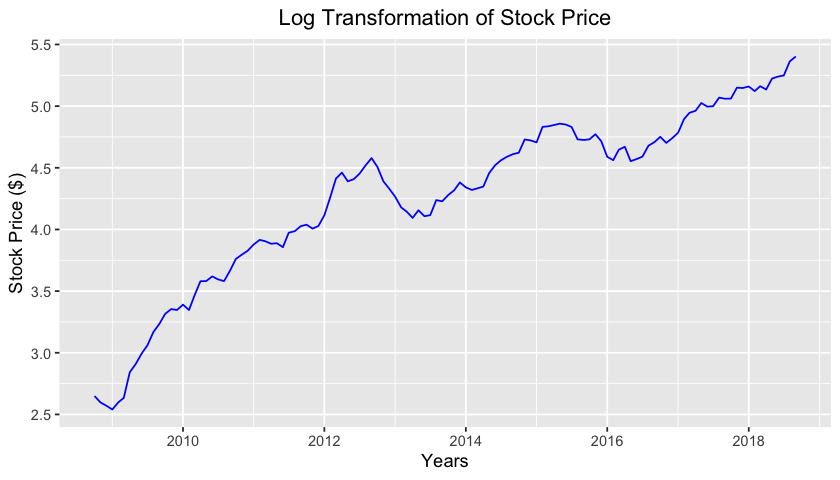

In [7]:
options(repr.plot.width=7, repr.plot.height=4)

stock_log <- log(stock_train)
stock_log <- ts(stock_log, start=c(2008, 10), freq=12)

autoplot(stock_log, colour="blue", xlab="Years", ylab="Stock Price ($)", main="Log Transformation of Stock Price") + 
theme(plot.title = element_text(hjust = 0.5))

In [8]:
options(warn=-1)

adf.test(stock_train, alternative="stationary", k=0)


	Augmented Dickey-Fuller Test

data:  stock_train
Dickey-Fuller = -0.17435, Lag order = 0, p-value = 0.99
alternative hypothesis: stationary


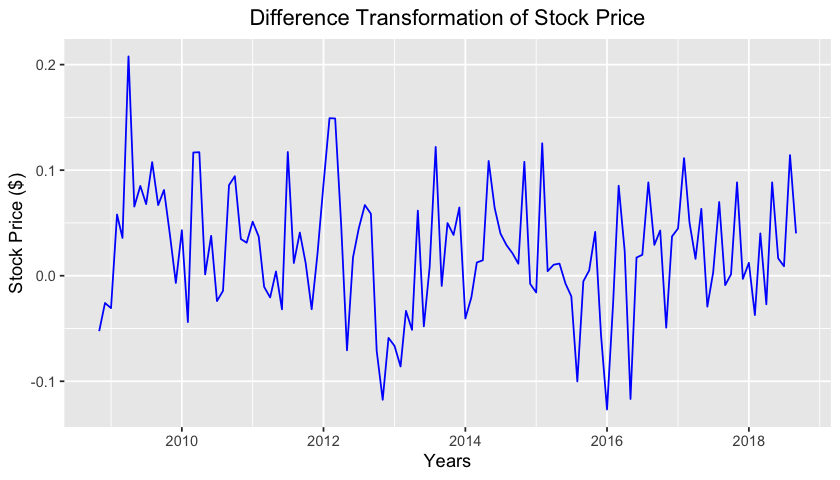

In [9]:
stock_diff <- diff(stock_log)

autoplot(stock_diff, colour="blue", xlab="Years", ylab="Stock Price ($)", main="Difference Transformation of Stock Price") + 
theme(plot.title = element_text(hjust = 0.5))

In [10]:
adf.test(stock_diff, alternative="stationary", k=0)


	Augmented Dickey-Fuller Test

data:  stock_diff
Dickey-Fuller = -8.3389, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


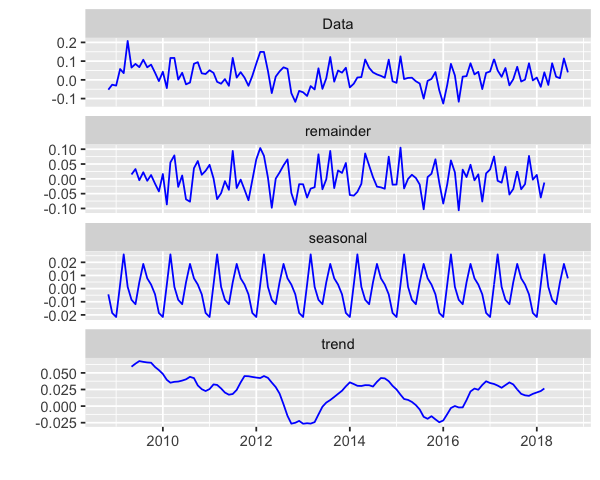

In [11]:
options(repr.plot.width=5, repr.plot.height=4)

autoplot(decompose(stock_diff), colour="blue")

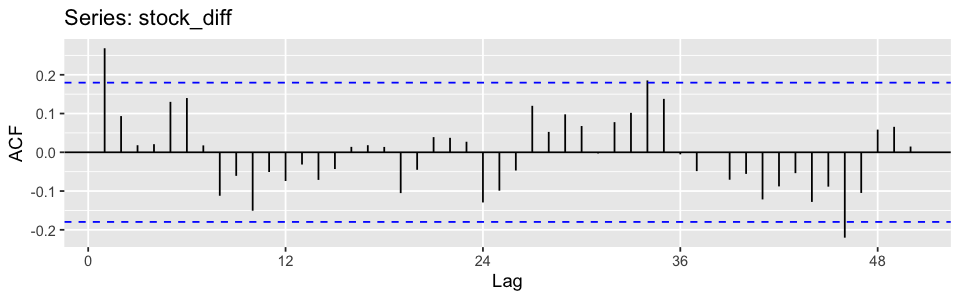

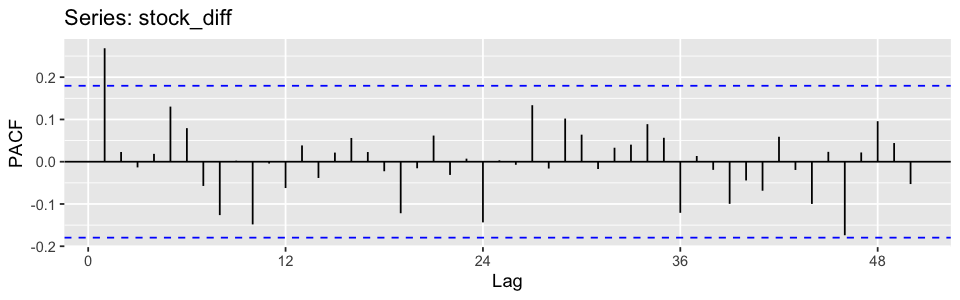

In [12]:
options(repr.plot.width=8, repr.plot.height=2.5)

ggAcf(stock_diff, lag=50)
ggPacf(stock_diff, lag=50)

In [13]:
auto.arima(stock_log, seasonal=TRUE, approximation=FALSE, trace=TRUE)


 ARIMA(2,1,2)(1,0,1)[12] with drift         : Inf
 ARIMA(0,1,0)            with drift         : -330.2367
 ARIMA(1,1,0)(1,0,0)[12] with drift         : -335.5192
 ARIMA(0,1,1)(0,0,1)[12] with drift         : -335.2149
 ARIMA(0,1,0)                               : -315.4829
 ARIMA(1,1,0)            with drift         : -337.0904
 ARIMA(1,1,0)(0,0,1)[12] with drift         : -335.7951
 ARIMA(1,1,0)(1,0,1)[12] with drift         : -335.0843
 ARIMA(2,1,0)            with drift         : -335.0275
 ARIMA(1,1,1)            with drift         : -335.0218
 ARIMA(0,1,1)            with drift         : -336.1247
 ARIMA(2,1,1)            with drift         : -332.9506
 ARIMA(1,1,0)                               : -330.6104

 Best model: ARIMA(1,1,0)            with drift         



Series: stock_log 
ARIMA(1,1,0) with drift 

Coefficients:
         ar1   drift
      0.2701  0.0230
s.e.  0.0884  0.0072

sigma^2 estimated as 0.003325:  log likelihood=171.65
AIC=-337.3   AICc=-337.09   BIC=-328.96

In [14]:
stock_results <- arima(stock_log, order=c(1,1,0))

summary(stock_results)


Call:
arima(x = stock_log, order = c(1, 1, 0))

Coefficients:
         ar1
      0.3668
s.e.  0.0851

sigma^2 estimated as 0.003511:  log likelihood = 167.36,  aic = -330.71

Training set error measures:
                     ME       RMSE        MAE       MPE     MAPE     MASE
Training set 0.01470523 0.05900801 0.04574611 0.3758265 1.107615 0.912936
                  ACF1
Training set -0.102342


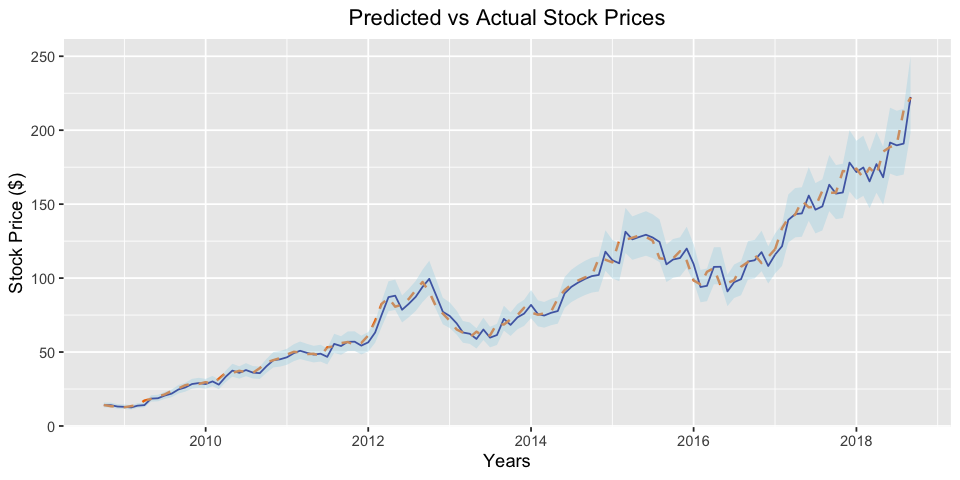

In [15]:
options(repr.plot.width=8, repr.plot.height=4)

arima_prediction <- fitted(stock_results)
arima_prediction <- exp(arima_prediction)
arima_prediction <- ts(arima_prediction, start=c(2008, 10), freq=12)
arima_prediction <- fortify(arima_prediction)
arima_prediction$Index <- as.Date(as.character(arima_prediction$Index), "%Y-%m-%d")

lower_prediction <- fitted(stock_results) - 1.96*sqrt(stock_results$sigma2)
lower_prediction <- exp(lower_prediction)
lower_prediction <- ts(lower_prediction, start=c(2008, 10), freq=12)
lower_prediction <- fortify(lower_prediction)
lower_prediction$Index <- as.Date(as.character(lower_prediction$Index), "%Y-%m-%d")

upper_prediction <- fitted(stock_results) + 1.96*sqrt(stock_results$sigma2)
upper_prediction <- exp(upper_prediction)
upper_prediction <- ts(upper_prediction, start=c(2008, 10), freq=12)
upper_prediction <- fortify(upper_prediction)
upper_prediction$Index <- as.Date(as.character(upper_prediction$Index), "%Y-%m-%d")

lower_upper_prediction <- merge(lower_prediction, upper_prediction, by="Index")

stock_train_copy <- ts(stock_train, start=c(2008, 10), freq=12)
stock_train_copy <- fortify(stock_train_copy)
stock_train_copy$Index <- as.Date(as.character(stock_train_copy$Index), "%Y-%m-%d")

other <- ggplot() +
geom_line(data=arima_prediction, aes(x = Index, y = Data), color = "darkblue") +
geom_line(data=stock_train_copy, aes(x = Index, y = Data), lty=2, lwd=0.7, color = "darkorange2") +
geom_ribbon(data=lower_upper_prediction, aes(x = Index, ymin = Data.x, ymax= Data.y), alpha=0.4, fill="lightblue") + 
ggtitle("Predicted vs Actual Stock Prices") +
theme(plot.title = element_text(hjust = 0.5)) +
xlab("Years") +
ylab("Stock Price ($)")

print(other)

In [16]:
prediction_ts <- ts(exp(fitted(stock_results)), start=c(2008, 10), freq=12)
stock_train_ts <- ts(stock_train, start=c(2008, 10), freq=12)

t(accuracy(stock_train_ts, prediction_ts))

,Test set
ME,-1.0465505
RMSE,5.6015469
MAE,3.8640051
MPE,-1.6479182
MAPE,4.6566467
ACF1,-0.1984850
Theil's U,0.7291656


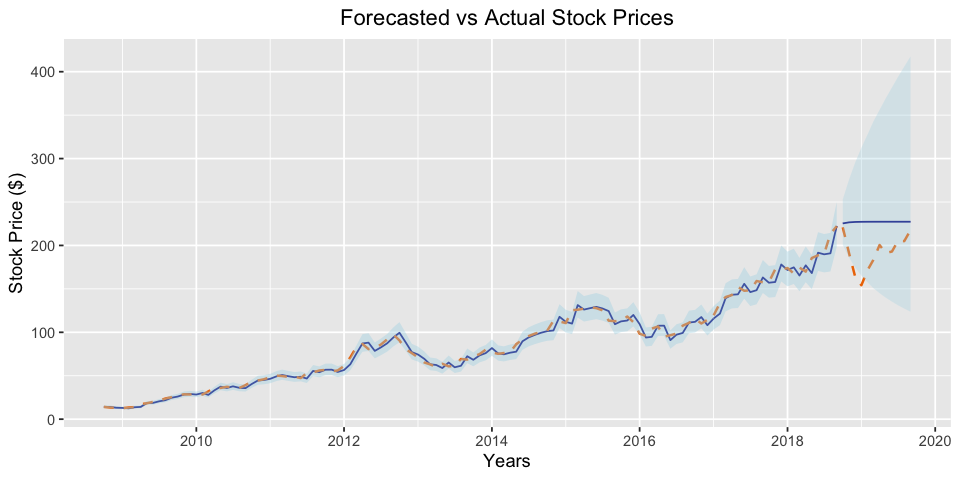

In [17]:
options(repr.plot.width=8, repr.plot.height=4)

arima_forecast <- forecast(stock_results, h=12)
arima_forecast <- exp(arima_forecast$mean)
arima_forecast <- ts(arima_forecast, start=c(2018, 10), freq=12)
arima_forecast <- fortify(arima_forecast)
arima_forecast$Index <- as.Date(as.character(arima_forecast$Index), "%Y-%m-%d")

forecast <- forecast(stock_results, h=12)

lower_forecast <- ts(forecast$lower[1:12,2])
lower_forecast <- exp(lower_forecast)
lower_forecast <- ts(lower_forecast, start=c(2018, 10), freq=12)
lower_forecast <- fortify(lower_forecast)
lower_forecast$Index <- as.Date(as.character(lower_forecast$Index), "%Y-%m-%d")

upper_forecast <- ts(forecast$upper[1:12,2])
upper_forecast <- exp(upper_forecast)
upper_forecast <- ts(upper_forecast, start=c(2018, 10), freq=12)
upper_forecast <- fortify(upper_forecast)
upper_forecast$Index <- as.Date(as.character(upper_forecast$Index), "%Y-%m-%d")

lower_upper_forecast <- merge(lower_forecast, upper_forecast, by="Index")

stock_test_copy <- ts(stock_test, start=c(2018, 10), freq=12)
stock_test_copy <- fortify(stock_test_copy)
stock_test_copy$Index <- as.Date(as.character(stock_test_copy$Index), "%Y-%m-%d")

other2 <- ggplot() +
geom_line(data=arima_prediction, aes(x = Index, y = Data), color = "darkblue") +
geom_line(data=stock_train_copy, aes(x = Index, y = Data), lty=2, lwd=0.7, color = "darkorange2") +
geom_ribbon(data=lower_upper_prediction, aes(x = Index, ymin = Data.x, ymax= Data.y), alpha=0.4, fill="lightblue") + 
geom_line(data=arima_forecast, aes(x = Index, y = Data), color = "darkblue") +
geom_line(data=stock_test_copy, aes(x = Index, y = Data), lty=2, lwd=0.7, color = "darkorange2") +
geom_ribbon(data=lower_upper_forecast, aes(x = Index, ymin = Data.x, ymax= Data.y), alpha=0.3, fill="lightblue") + 
ggtitle("Forecasted vs Actual Stock Prices") +
theme(plot.title = element_text(hjust = 0.5)) +
xlab("Years") +
ylab("Stock Price ($)") + 
scale_x_date(breaks=date_breaks("2 years"), labels=date_format("%Y"))

print(other2)

In [18]:
forecast_ts <- ts(exp(forecast$mean), start=c(2008, 10), freq=12)
stock_test_ts <- ts(stock_test, start=c(2008, 10), freq=12)

t(accuracy(stock_test_ts, forecast_ts))

,Test set
ME,35.5258511
RMSE,40.6526308
MAE,35.5258511
MPE,15.6397053
MAPE,15.6397053
ACF1,0.5117229
Theil's U,106.6855532


In [19]:
stock_train_set <- data.frame(date=index(stock_ts["/2018-09-28"]), coredata(stock_ts["/2018-09-28"]))
names(stock_train_set) <- c("ds", "y")

tail(stock_train_set)

,ds,y
,<date>,<dbl>
115,2018-04-30,169.8343
116,2018-05-31,185.5368
117,2018-06-29,188.6214
118,2018-07-31,190.3114
119,2018-08-31,213.3461
120,2018-09-28,222.0737


In [20]:
prophet_model <- prophet(stock_train_set, 
                         growth="linear",
                         seasonality.mode="additive",
                         daily.seasonality=FALSE,
                         weekly.seasonality=FALSE,
                         yearly.seasonality=TRUE)

In [21]:
future_prices <- make_future_dataframe(prophet_model, freq="month", periods=12)

prophet_df <- predict(prophet_model, future_prices)

tail(prophet_df[c('ds', 'yhat', 'yhat_lower', 'yhat_upper')])

,ds,yhat,yhat_lower,yhat_upper
,<dttm>,<dbl>,<dbl>,<dbl>
127,2019-04-28,194.7601,179.1555,209.8103
128,2019-05-28,210.1206,195.5408,225.3496
129,2019-06-28,203.6924,188.4030,218.5754
130,2019-07-28,185.6654,170.9749,199.9965
131,2019-08-28,194.7788,179.1806,209.5412
132,2019-09-28,243.8367,228.8389,258.1295


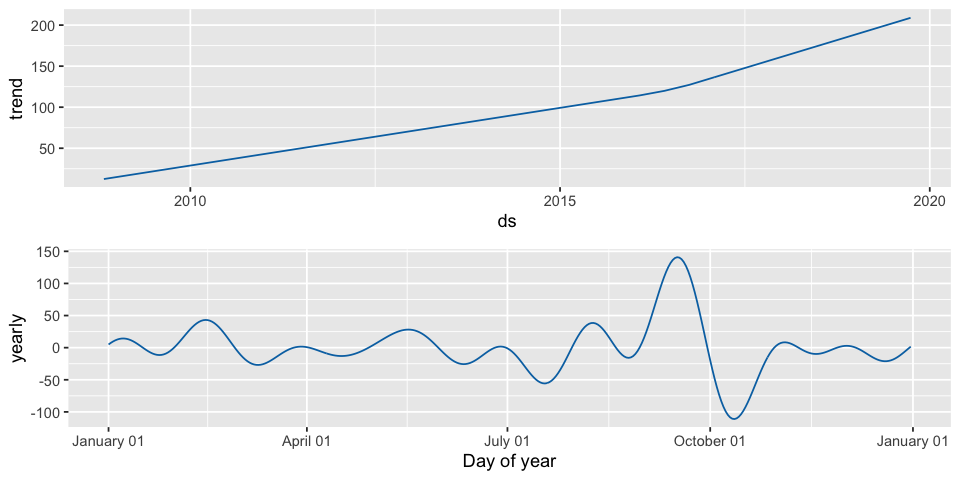

In [22]:
prophet_plot_components(prophet_model, prophet_df)

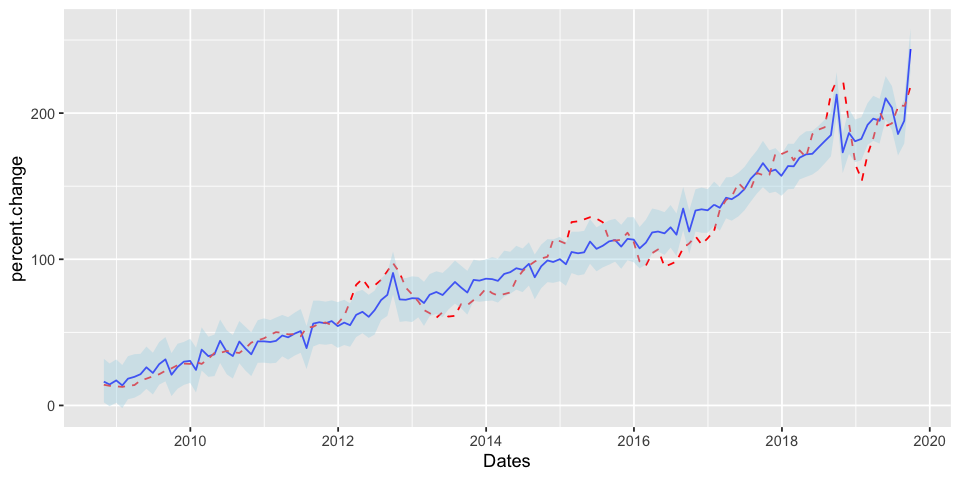

In [23]:
stock_test_set <- data.frame(date=index(stock_ts["2018-10-31/"]), coredata(stock_ts["2018-10-31/"]))
names(stock_test_set) <- c("ds", "y")

prophet_df$ds <- ymd(prophet_df$ds)

p <- ggplot() + 
geom_line(data = prophet_df, aes(x = ds, y = yhat), color = "blue") +
geom_line(data = stock_train_set, aes(x = ds, y = y), color = "red", lty=2) +
geom_line(data = stock_test_set, aes(x = ds, y = y), color = "red", lty=2) +
geom_ribbon(data = prophet_df, aes(x = ds, ymin = yhat_lower, ymax= yhat_upper), alpha=0.4, fill="lightblue") + 
xlab('Dates') +
ylab('percent.change') + 
scale_x_date(breaks=date_breaks("2 years"), labels=date_format("%Y"))

print(p)

In [25]:
prophet_prediction <- prophet_df$yhat[1:120]
prophet_forecast <- prophet_df$yhat[121:132]

t(accuracy(prophet_prediction, stock_train))
t(accuracy(prophet_forecast, stock_test))

,Test set
ME,-0.02407546
RMSE,11.58970622
MAE,9.03445929
MPE,-2.99759110
MAPE,12.41788587


,Test set
ME,-3.792795
RMSE,21.631331
MAE,18.465306
MPE,-2.756204
MAPE,9.672538
